In [239]:
import pandas as pd


In [240]:
data={
    "Name":["Hashini","Kasuni","Achin","Schintha","Shani"],
    "Age":[20,24,25,30,27],
    "Profession":["Scientist","Desiner","Chef","Accountant","Engineer"]
}

In [241]:
df=pd.DataFrame(data)

In [242]:
df

,Name,Age,Profession
0,Hashini,20,Scientist
1,Kasuni,24,Desiner
2,Achin,25,Chef
3,Schintha,30,Accountant
4,Shani,27,Engineer


In [243]:
#iterrows funtion - is a function used to loop (iterate) over rows of a DataFrame one row at a time.
for i, row in df.iterrows():
  print(row["Name"])

Hashini
Kasuni
Achin
Schintha
Shani


In [244]:
#Vectorized Operation
df["Result"] = df["Age"] <=25
df["Result"] =df["Result"].map({True:"YOUNG", False:"ADULT"})
df

,Name,Age,Profession,Result
0,Hashini,20,Scientist,YOUNG
1,Kasuni,24,Desiner,YOUNG
2,Achin,25,Chef,YOUNG
3,Schintha,30,Accountant,ADULT
4,Shani,27,Engineer,ADULT


In [245]:
#lambda function more esay
df["Result"] = df["Age"].apply(lambda x:"YOUNG" if x<=25 else "ADULT")
df

,Name,Age,Profession,Result
0,Hashini,20,Scientist,YOUNG
1,Kasuni,24,Desiner,YOUNG
2,Achin,25,Chef,YOUNG
3,Schintha,30,Accountant,ADULT
4,Shani,27,Engineer,ADULT


In [246]:
#itertuples
for i in df.itertuples():
  print(i)

Pandas(Index=0, Name='Hashini', Age=20, Profession='Scientist', Result='YOUNG')
Pandas(Index=1, Name='Kasuni', Age=24, Profession='Desiner', Result='YOUNG')
Pandas(Index=2, Name='Achin', Age=25, Profession='Chef', Result='YOUNG')
Pandas(Index=3, Name='Schintha', Age=30, Profession='Accountant', Result='ADULT')
Pandas(Index=4, Name='Shani', Age=27, Profession='Engineer', Result='ADULT')


In [247]:
#multiindexing in Pandas
arrays = [
    ["India", "India", "USA", "USA"],
    ["Delhi", "Mumbai", "New York", "Chicago"]
]

index = pd.MultiIndex.from_arrays(arrays, names=("Country", "City"))

df1 = pd.DataFrame({
    "Population": [19, 20, 8, 3],
    "Area": [1484, 603, 783, 589]
}, index=index)

print(df1)

                  Population  Area
Country City                      
India   Delhi             19  1484
        Mumbai            20   603
USA     New York           8   783
        Chicago            3   589


In [248]:
df1.loc["India"]

,Population,Area
City,,
Delhi,19,1484
Mumbai,20,603


In [249]:
df1.loc[("USA", "Chicago")]


,USA
,Chicago
Population,3
Area,589


In [250]:
df1.loc[("India", "Delhi"), "Population"]


np.int64(19)

In [251]:
arrays = [
    ["Name","Name","Age","Age"],
    ["Hashini","Kasuni",29,28] ]

columns = pd.MultiIndex.from_arrays(arrays)
df3 = pd.DataFrame( [
    ["Matara","Dewndara","Gandara","kapugama"],
    ["1995","1994","1996","1997"] ],
index=["city","BirthYear"],
columns=columns )
print(df3)

             Name                Age          
          Hashini    Kasuni       29        28
city       Matara  Dewndara  Gandara  kapugama
BirthYear    1995      1994     1996      1997


In [252]:
list = pd.MultiIndex.from_frame(df)
list

MultiIndex([( 'Hashini', 20,  'Scientist', 'YOUNG'),
            (  'Kasuni', 24,    'Desiner', 'YOUNG'),
            (   'Achin', 25,       'Chef', 'YOUNG'),
            ('Schintha', 30, 'Accountant', 'ADULT'),
            (   'Shani', 27,   'Engineer', 'ADULT')],
           names=['Name', 'Age', 'Profession', 'Result'])

In [253]:
list[0][0]

'Hashini'

In [254]:
#Reindexing in pandas means changing the labels of rows or columns of a DataFrame (or Series)
#to a new index.

#df4 = df3.reindex(["country","birthY"])
df4 = df3.rename(index={
    "city": "country",
    "BirthYear": "birthY"
})
print(df4)

           Name                Age          
        Hashini    Kasuni       29        28
country  Matara  Dewndara  Gandara  kapugama
birthY     1995      1994     1996      1997


In [255]:
df5 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Score": [80, 90, 85]
}, index=["A", "B", "C"])

print(df5)

      Name  Score
A    Alice     80
B      Bob     90
C  Charlie     85


In [256]:
df6 = df5.reindex(["C", "A", "B"])
print(df6)

      Name  Score
C  Charlie     85
A    Alice     80
B      Bob     90


In [257]:
#Merge in Pandas
fd = pd.DataFrame({
    "ID":[1,2,3],
    "Name":["Alice","Bob","Charlie"]
})

fd1 = pd.DataFrame({
    "ID":[1,2,4],
    "Score":[80,90,75]
})

result1 = pd.merge(fd,fd1, on="ID")
print(result1)

   ID   Name  Score
0   1  Alice     80
1   2    Bob     90


In [258]:
#Concat
fd2 = pd.DataFrame({
    "Name": ["Alice", "Bob"],
    "Score": [80, 90]
})

fd3 = pd.DataFrame({
    "Name": ["Charlie"],
    "Score": [85]
})

result3 = pd.concat([fd2, fd3])
print(result3)

      Name  Score
0    Alice     80
1      Bob     90
0  Charlie     85


In [259]:
gf1 = pd.DataFrame({
    "Grade": ["A", "B", "A", "C", "B"]
})

print(gf1)

  Grade
0     A
1     B
2     A
3     C
4     B


In [260]:
gf1["Grade"] = gf1["Grade"].astype("category")
gf1
gf1["Grade"].cat.categories
gf1["Grade"].cat.codes


,0
0,0
1,1
2,0
3,2
4,1


In [261]:
#map - Series only, Change values one by one
sa = pd.DataFrame({
    "Grade": ["A","B","C","A"]
})
sa["Grade_Num"] = sa["Grade"].map({
    "A":1,
    "B":2,
    "C":3,
})
print(sa)

  Grade  Grade_Num
0     A          1
1     B          2
2     C          3
3     A          1


In [262]:
#apply - Series or DataFrame, Apply function along rows or columns
sa1 = pd.DataFrame({
    "Math":[80,90,40],
    "Science":[89,97,60]
})

sa1["Total"] = sa1.apply(sum,axis=1)
print(sa1)

   Math  Science  Total
0    80       89    169
1    90       97    187
2    40       60    100


In [263]:
#applymap - DataFrame only, Apply function to every single cell
sa2 = pd.DataFrame({
    "A":[1,2],
    "B":[3,4]
})

sa3 = sa2.applymap(lambda x:x*10)
print(sa3)

    A   B
0  10  30
1  20  40


/tmp/ipython-input-1779227489.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sa3 = sa2.applymap(lambda x:x*10)


In [264]:
#Converting a Series → DataFrame
dc = pd.Series([10,20,30,40],name="Score")
dc1=dc.to_frame()
print(dc1)

   Score
0     10
1     20
2     30
3     40


In [265]:
dc = pd.Series([10,20,30,40])
dc

,0
0,10
1,20
2,30
3,40


In [266]:
#how do you convert categorical values in a column into numerical ones

#Grade is categorical (text values).
gb = pd.DataFrame({
    "Grade": ["A", "B", "C", "A", "B"]
})
#Convert categories to numbers
gb["Grade_num"] = gb["Grade"].map({
    "A":3,
    "B":2,
    "C":1,
})

#Convert to category → get codes - astype('category').cat.codes
gb["Grade_code"] = gb["Grade"].astype("category").cat.codes

#Ordered categorical (Correct ranking)
gb["Grade_ordered"] = pd.Categorical(
    gb["Grade"],
    categories=["C", "B", "A"],
    ordered=True
)

gb["Grade_num2"] = gb["Grade_ordered"].cat.codes
print(gb)

  Grade  Grade_num  Grade_code Grade_ordered  Grade_num2
0     A          3           0             A           2
1     B          2           1             B           1
2     C          1           2             C           0
3     A          3           0             A           2
4     B          2           1             B           1


In [267]:
#Aggregation
gh = pd.DataFrame({
    "Class":["A","A","B","B","B"],
    "Marks":[80,90,70,85,75]
})
print(gh)

  Class  Marks
0     A     80
1     A     90
2     B     70
3     B     85
4     B     75


In [268]:
#Average marks of all students
gh["Marks"].mean()

np.float64(80.0)

In [269]:
#Average marks per class
gh.groupby("Class")["Marks"].mean()

,Marks
Class,
A,85.000000
B,76.666667


In [270]:
#Multiple Aggregations at once
gh.groupby("Class")["Marks"].agg(["mean","max","min"])

,mean,max,min
Class,,,
A,85.000000,90,80
B,76.666667,85,70


In [271]:
#sort_values
qw = pd.DataFrame({
    "Name": ["Charlie", "Alice", "Bob"],
    "Age": [25, 30, 20],
    "Score": [85, 90, 70]
})
print(qw)

      Name  Age  Score
0  Charlie   25     85
1    Alice   30     90
2      Bob   20     70


In [272]:
#Sort by ONE column (sort_values)
qw_sorted = qw.sort_values(by="Age",ascending=False)

print(qw_sorted)

      Name  Age  Score
1    Alice   30     90
0  Charlie   25     85
2      Bob   20     70


In [273]:
#Sort by MULTIPLE columns
qw.sort_values(by=["Age","Score"])

,Name,Age,Score
2,Bob,20,70
0,Charlie,25,85
1,Alice,30,90


In [274]:
qw.sort_index()


,Name,Age,Score
0,Charlie,25,85
1,Alice,30,90
2,Bob,20,70


In [275]:
qw.sort_index(ascending=False)


,Name,Age,Score
2,Bob,20,70
1,Alice,30,90
0,Charlie,25,85


In [276]:
qw.sort_values(by="Score", na_position="last")


,Name,Age,Score
2,Bob,20,70
0,Charlie,25,85
1,Alice,30,90


In [277]:
fg = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Score": [90, pd.NA, 75, 85]
})
fg

,Name,Score
0,Alice,90
1,Bob,<NA>
2,Charlie,75
3,David,85


In [278]:
fg.sort_values(by="Score", na_position="last")


,Name,Score
2,Charlie,75
3,David,85
0,Alice,90
1,Bob,<NA>


In [279]:
#what is the different between interpolate() and fillna() in pandas
we = pd.DataFrame({
    "Day": [1, 2, 3, 4, 5],
    "Temperature": [30, pd.NA, pd.NA, 36, 38]
})
#convert to object to numeric
we["Temperature"] = pd.to_numeric(we["Temperature"], errors="coerce")
we

,Day,Temperature
0,1,30.0
1,2,NaN
2,3,NaN
3,4,36.0
4,5,38.0


In [280]:
#fillna() — simple replacement - Fill missing with a fixed value
#Missing values replaced with same value.
we["Temperature"].fillna(0)


,Temperature
0,30.0
1,0.0
2,0.0
3,36.0
4,38.0


In [281]:
#Fill with mean - All missing values get the same average
we["Temperature"].fillna(we["Temperature"].mean())

,Temperature
0,30.000000
1,34.666667
2,34.666667
3,36.000000
4,38.000000


In [282]:
#interpolate() — smart estimation , Linear interpolation
#Values are calculated using surrounding numbers.
we["Temperature"].interpolate()

,Temperature
0,30.0
1,32.0
2,34.0
3,36.0
4,38.0


In [283]:
#pivot - important for reshaping data.
#You want unique values as columns , No duplicate combinations
zx = pd.DataFrame({
    "Student": ["Alice", "Alice", "Bob", "Bob"],
    "Subject": ["Math", "Science", "Math", "Science"],
    "Marks": [85, 90, 78, 82]
})

wide_df = zx.pivot(index="Student", columns="Subject", values="Marks")
print(wide_df)

Subject  Math  Science
Student               
Alice      85       90
Bob        78       82


In [284]:
#melt - You want to convert columns into rows
df_wide = pd.DataFrame({
    "Student": ["Alice", "Bob"],
    "Math": [85, 78],
    "Science": [90, 82]
})

long_df = df_wide.melt(
    id_vars="Student",
    var_name="Subject",
    value_name="Marks"
)

print(long_df)

  Student  Subject  Marks
0   Alice     Math     85
1     Bob     Math     78
2   Alice  Science     90
3     Bob  Science     82


In [285]:
bn = pd.DataFrame({
    "Date": ["2024-01", "2024-01", "2024-02", "2024-02"],
    "Product": ["Pen", "Pencil", "Pen", "Pencil"],
    "Sales": [100, 150, 120, 180]
})

pivot_bn = bn.pivot(index="Date",columns="Product",values="Sales")
print(pivot_bn)


Product  Pen  Pencil
Date                
2024-01  100     150
2024-02  120     180


In [286]:
survey = pd.DataFrame({
    "Name": ["John", "Anna"],
    "Q1": ["Yes", "No"],
    "Q2": ["No", "Yes"],
    "Q3": ["Yes", "Yes"]
})

s_long = survey.melt(
    id_vars="Name",
    var_name="Question",
    value_name="Answer"
)
print(s_long)

   Name Question Answer
0  John       Q1    Yes
1  Anna       Q1     No
2  John       Q2     No
3  Anna       Q2    Yes
4  John       Q3    Yes
5  Anna       Q3    Yes


In [287]:
qw

,Name,Age,Score
0,Charlie,25,85
1,Alice,30,90
2,Bob,20,70


<Axes: >

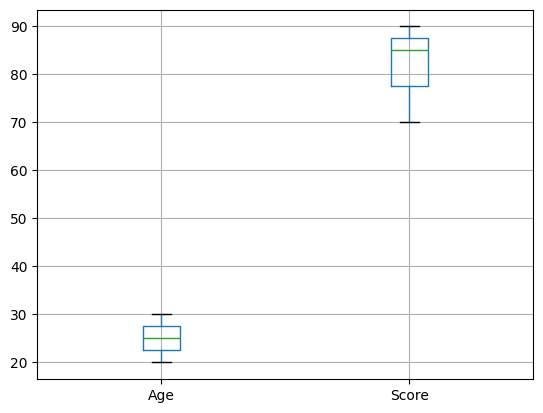

In [288]:
qw.boxplot()

In [289]:
#Duplicate
fgh = pd.DataFrame({
    "Name": ["Alice", "Bob", "Alice", "Charlie", "Bob"],
    "Score": [90, 80, 90, 85, 80]
})

print(fgh)

      Name  Score
0    Alice     90
1      Bob     80
2    Alice     90
3  Charlie     85
4      Bob     80


In [290]:
fgh.duplicated()

,0
0,False
1,False
2,True
3,False
4,True


In [291]:
fgh.duplicated(subset=["Name"])


,0
0,False
1,False
2,True
3,False
4,True


In [292]:
fgh.duplicated().sum()

np.int64(2)

In [293]:
fgh[fgh.duplicated()]

,Name,Score
2,Alice,90
4,Bob,80


In [294]:
#remove duplicate
df_no_dup = fgh.drop_duplicates()
print(df_no_dup)



      Name  Score
0    Alice     90
1      Bob     80
3  Charlie     85


In [295]:
fgh.drop_duplicates(subset=["Name"])


,Name,Score
0,Alice,90
1,Bob,80
3,Charlie,85


In [296]:
fgh

,Name,Score
0,Alice,90
1,Bob,80
2,Alice,90
3,Charlie,85
4,Bob,80


In [297]:
fgh.drop_duplicates(keep=False)


,Name,Score
3,Charlie,85


In [298]:
#add a row to a pandas dataframe
ty = pd.DataFrame({
    "Name": ["Alice", "Bob"],
    "Score": [90, 80]
})

ty.loc[len(ty)] = ["Charlie",85]

print(ty)

      Name  Score
0    Alice     90
1      Bob     80
2  Charlie     85


In [299]:
#Add row using a dictionary
ty.loc[len(ty)] = {
    "Name": "David",
    "Score":88
}
print(ty)

      Name  Score
0    Alice     90
1      Bob     80
2  Charlie     85
3    David     88


In [300]:
#Add multiple rows using pd.concat() (BEST for many rows)
new_ty = pd.DataFrame({
    "Name":["Eve","Frank"],
    "Score": [ 90,96]
})

ty = pd.concat([ty,new_ty], ignore_index=True)
print(ty)

      Name  Score
0    Alice     90
1      Bob     80
2  Charlie     85
3    David     88
4      Eve     90
5    Frank     96


In [301]:
#Create a Timedelta using pd.Timedelta()
t = pd.Timedelta(days=5)
print(t)

5 days 00:00:00


In [302]:
t = pd.Timedelta(days=2, hours=3, minutes=30)
print(t)


2 days 03:30:00


In [303]:
t = pd.Timedelta("3 days")
t

Timedelta('3 days 00:00:00')

In [304]:
t = pd.Timedelta("2 days 4 hours 10 minutes")
t

Timedelta('2 days 04:10:00')

In [305]:
mn = pd.DataFrame({
    "Start": pd.to_datetime(["2024-01-01", "2024-01-05"]),
    "End": pd.to_datetime(["2024-01-10", "2024-01-12"])
})

mn["Duration"] = mn["End"] - mn["Start"]
print(mn)

       Start        End Duration
0 2024-01-01 2024-01-10   9 days
1 2024-01-05 2024-01-12   7 days


In [306]:
#what do describe() percentiles values represent
s = pd.Series([60, 70, 80, 90, 100])
print(s.describe())

count      5.000000
mean      80.000000
std       15.811388
min       60.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      100.000000
dtype: float64


In [307]:
 #loc && iloc

r = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Score": [85, 90, 75, 88]
}, index=["a", "b", "c", "d"])

print(r)

      Name  Score
a    Alice     85
b      Bob     90
c  Charlie     75
d    David     88


In [308]:
r.loc["b"]

,b
Name,Bob
Score,90


In [309]:
r.loc["b", "Score"]


np.int64(90)

In [310]:
r.loc[["a", "c"]]


,Name,Score
a,Alice,85
c,Charlie,75


In [311]:
r.iloc[1]

,b
Name,Bob
Score,90


In [312]:
r.iloc[1, 1]


np.int64(90)

In [313]:
r.iloc[[0, 2]]


,Name,Score
a,Alice,85
c,Charlie,75


In [314]:
#What is vectorization in pandas? - Vectorization means performing operations on an
#entire column (array) at once, instead of looping row by row.
er = pd.DataFrame({
    "A": [1, 2, 3, 4],
    "B": [10, 20, 30, 40]
})
er["C"] = er["A"] + er["B"]
er["D"] = er["A"] * 2
er["High"] = er["B"] > 20
er

,A,B,C,D,High
0,1,10,11,2,False
1,2,20,22,4,False
2,3,30,33,6,True
3,4,40,44,8,True


In [315]:
#merge() → Database-style join - Use this when the DataFrames share a common column (key).
mk1 = pd.DataFrame({
    "ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"]
})

mk2 = pd.DataFrame({
    "ID": [1, 2, 4],
    "Score": [85, 90, 88]
})
merged = pd.merge(mk1, mk2, on="ID")
merged

,ID,Name,Score
0,1,Alice,85
1,2,Bob,90


In [316]:
#Left Join - All rows from mk1
pd.merge(mk1, mk2, on="ID", how="left")

,ID,Name,Score
0,1,Alice,85.0
1,2,Bob,90.0
2,3,Charlie,NaN


In [317]:
#Right Join - All rows from mk2
pd.merge(mk1, mk2, on="ID", how="right")


,ID,Name,Score
0,1,Alice,85
1,2,Bob,90
2,4,NaN,88


In [318]:
#Outer Join - All rows from both
pd.merge(mk1, mk2, on="ID", how="outer")


,ID,Name,Score
0,1,Alice,85.0
1,2,Bob,90.0
2,3,Charlie,NaN
3,4,NaN,88.0


In [319]:
pd.concat([mk1, mk2], axis=1)


,ID,Name,ID,Score
0,1,Alice,1,85
1,2,Bob,2,90
2,3,Charlie,4,88
